In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [4]:
file = "C:\\Users\\Administrator\\Mini Project\\"

In [5]:
len(file)

36

In [6]:
print(len(os.listdir(file+'daily_dataset')))
os.

SyntaxError: invalid syntax (<ipython-input-6-70026ea44dc1>, line 2)

In [2]:
missing_values= ["na", "N/A","n/a","--"]

In [3]:
consume= pd.read_excel('Consumption.xlsx', na_values= missing_values)

In [4]:
consume.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [5]:
consume['heating_off']=consume['temp_inside'].isnull()

In [6]:
consume

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,heating_off
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10,False
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,False
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,False
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,False
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,False
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,False
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,False
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,False


In [7]:
consume.specials.isnull()

0       True
1       True
2       True
3       True
4       True
       ...  
383     True
384    False
385     True
386    False
387    False
Name: specials, Length: 388, dtype: bool

Text(0, 0.5, 'consume in L/100km')

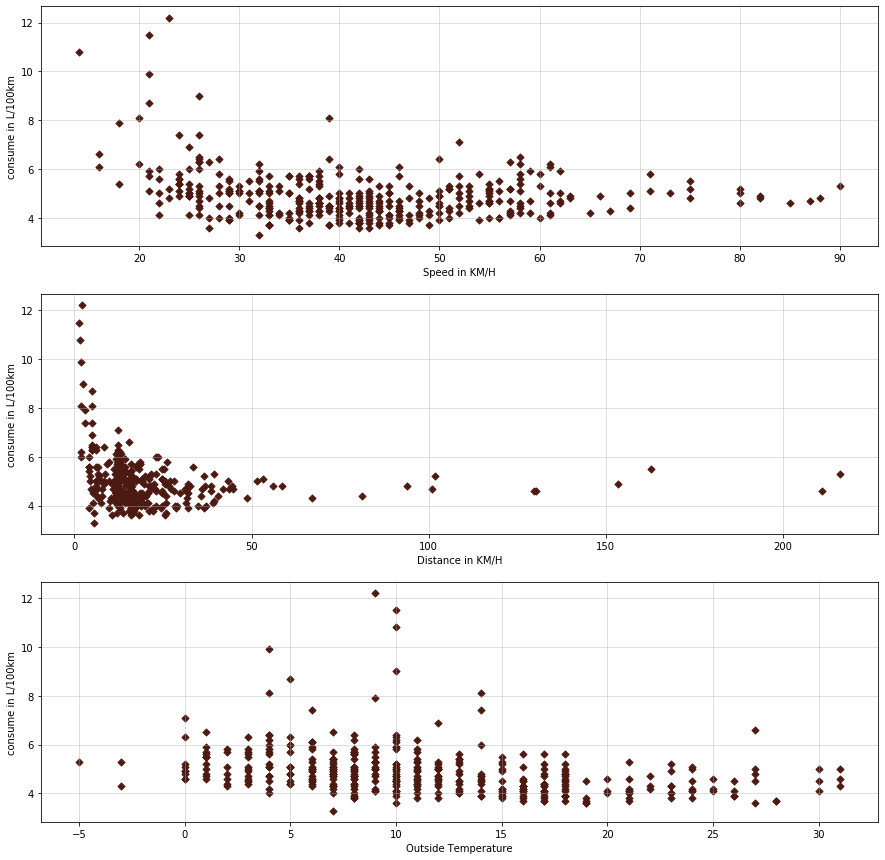

In [8]:
%matplotlib inline
fig, ax = plt.subplots(3)
fig.set_size_inches(w=15, h=15)
halo = [[.3, 0.1, 0.07]]

ax[0].scatter(consume.speed.values,consume.consume.values,c= halo, marker= 'D', s=25)
ax[0].grid(alpha=.5)
ax[0].set_xlabel('Speed in KM/H')
ax[0].set_ylabel('consume in L/100km')

ax[1].scatter(consume.distance.values, consume.consume.values, c=halo, marker='D', s=25)
ax[1].grid(alpha=.5)
ax[1].set_xlabel('Distance in KM/H')
ax[1].set_ylabel('consume in L/100km')

ax[2].scatter(consume.temp_outside.values,consume.consume.values,c= halo, marker= 'D', s=25)
ax[2].grid(alpha=.5)
ax[2].set_xlabel('Outside Temperature')
ax[2].set_ylabel('consume in L/100km')




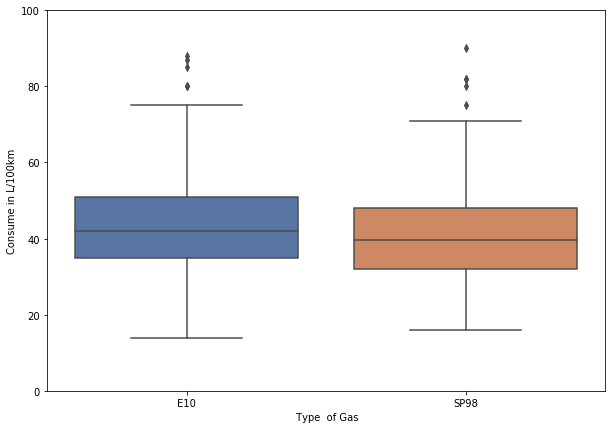

In [45]:
 plt.subplots(1,figsize=(10,7))

ax= sns.boxplot(
    x='gas_type',
    y='speed',
    data= consume,
    palette='deep',
)

ax.set_xlabel(' Type  of Gas')
ax.set_ylabel('Consume in L/100km')
ax.set_ylim([0,100])

plt.show()

In [46]:
y=consume.groupby('gas_type')['consume'].mean()

In [47]:
y

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

In [11]:
corr= consume.corr()

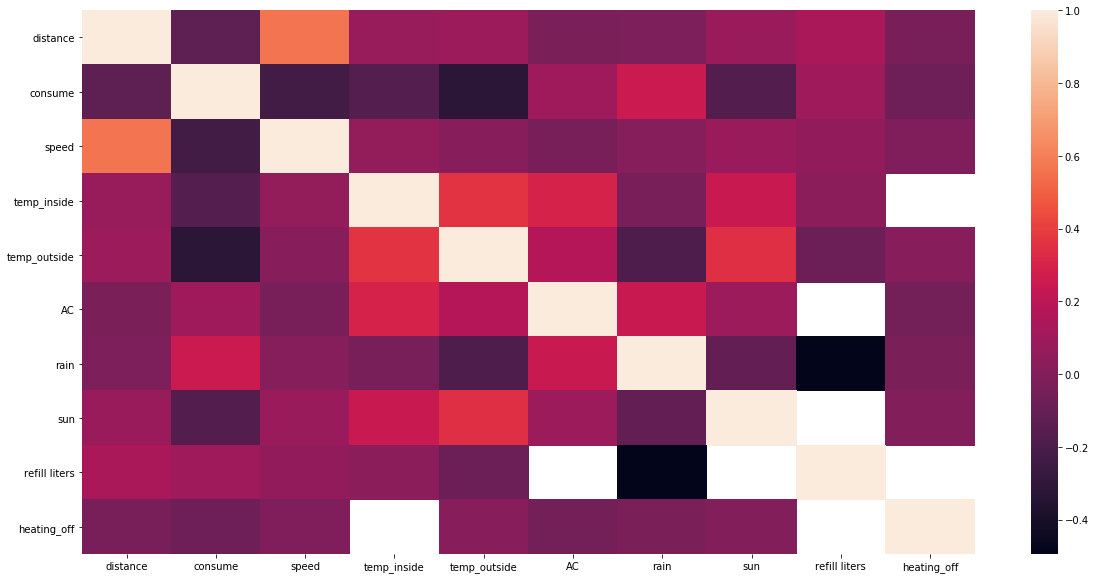

In [18]:
fig, plt.subplots(1, figsize= (20,10))
ax=sns.heatmap(corr)



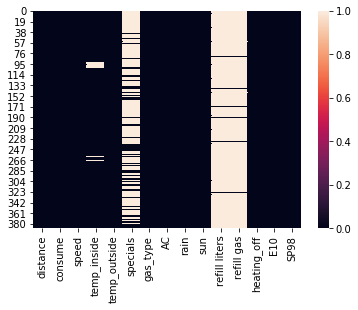

In [19]:
sns.heatmap(consume.isnull())

In [20]:
mn_temp=consume['temp_inside'].mean()

In [21]:
consume['temp_inside'].fillna(mn_temp,inplace=True)

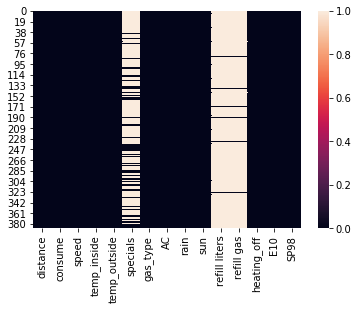

In [22]:
sns.heatmap(consume.isnull())

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [24]:
X= consume[['distance', 'speed', 'temp_outside', 'temp_inside', 'AC', 'rain', 'sun']]

In [25]:
y= consume['consume']

In [26]:
X.isnull().count()

distance        388
speed           388
temp_outside    388
temp_inside     388
AC              388
rain            388
sun             388
dtype: int64

In [27]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
print(X_test.shape)
print(y_test.shape)

(117, 7)
(117,)


In [29]:
print(X_train.shape)
print(y_train.shape)

(271, 7)
(271,)


In [30]:
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred= reg.predict(X_test)

In [32]:
y_pred

array([4.74529019, 5.28091233, 5.11846572, 5.18647684, 4.56157009,
       5.94153804, 5.67791213, 5.1875266 , 5.9184726 , 4.89999431,
       4.11401843, 4.81816564, 6.55944917, 4.54590356, 5.15076404,
       5.27935583, 5.56137799, 5.17741341, 5.50606796, 5.30926079,
       4.15432495, 5.25542486, 4.98292477, 5.18492997, 4.91054992,
       4.83501281, 4.6153078 , 4.22470594, 5.13956507, 3.94766814,
       4.92771037, 5.2418133 , 4.6973807 , 4.6029162 , 5.59025114,
       4.99367775, 4.60405314, 4.05578834, 5.13330389, 6.09737077,
       4.43083181, 5.24444636, 5.4076802 , 4.4752234 , 4.65430171,
       4.33884762, 5.04636663, 5.21386519, 4.98020461, 4.9576386 ,
       4.81670463, 5.45808593, 5.40516957, 5.22776237, 4.66457082,
       4.94235635, 6.70676371, 5.38773946, 4.67134584, 4.8131749 ,
       5.45529103, 4.87254016, 4.59362312, 4.75236474, 4.39718117,
       4.71136158, 5.58965398, 4.37456263, 4.84902188, 4.87653148,
       4.31628735, 4.70226084, 5.22645747, 4.91851878, 5.13891

In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

0.6635761182069624
0.7424532609047082
0.8616572757800565


In [34]:
reg.coef_, reg.intercept_

(array([ 0.00523674, -0.02371772, -0.03724498, -0.14711979,  0.41456804,
         0.61676684, -0.06407861]),
 9.389308142257125)

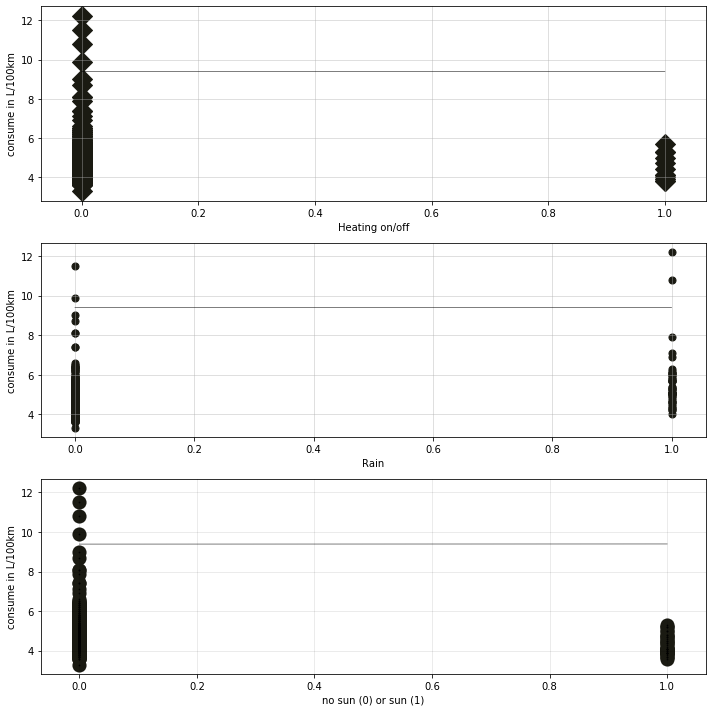

In [35]:
%matplotlib inline
fig, ax = plt.subplots(3, 1,figsize=(10,10))
X=np.array([0,1.])
halo = [[.1, 0.1, 0.07]]

ax[0].scatter(consume.heating_off.values, consume.consume.values, c=halo, s=200, marker='D')
ax[0].plot(X,  X*reg.coef_[0]+reg.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[0].grid(alpha=.5)
ax[0].set_xlabel('Heating on/off')
ax[0].set_ylabel('consume in L/100km')

ax[1].scatter(consume.rain.values, consume.consume.values, c=halo, s=200, marker='.')
ax[1].plot(X,  X*reg.coef_[0]+reg.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[1].grid(alpha=.5)
ax[1].set_xlabel('Rain')
ax[1].set_ylabel('consume in L/100km')


ax[2].plot(X,  X*reg.coef_[0]+reg.intercept_, color='#000000', alpha=1, linewidth=0.5)
ax[2].scatter(consume.sun.values, consume.consume.values, color=halo, s=200, marker='o', linewidths=0)
ax[2].scatter(consume.sun.values, consume.consume.values, color='#000000', s=0.5, marker='o', alpha=.9)
ax[2].grid(color='#000000', linestyle='-', linewidth=1, alpha=0.08)
ax[2].set_xlabel('no sun (0) or sun (1)')
text = ax[2].set_ylabel('consume in L/100km')


fig.tight_layout()

In [36]:
dummy =pd.get_dummies(consume.gas_type)

In [37]:
consume= pd.concat(([consume,dummy]),axis=1)

In [38]:
X1= consume.drop(['gas_type','consume','specials','refill gas','refill liters'],axis=1)

In [39]:
y1= consume.consume

In [40]:
X1_train,X1_test,y1_train,y1_test= train_test_split(X1,y1,test_size=0.3, random_state=42)

In [457]:
print(X1_train.shape)
print(X1_test.shape)

print(y1_train.shape)
print(y1_test.shape)

(271, 10)
(117, 10)
(271,)
(117,)


In [464]:
reg.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [465]:
y_pred1= reg.predict(X1_test)

In [466]:
y_pred1

array([4.81585325, 5.26254668, 5.17479464, 5.2438117 , 4.54549221,
       5.98688904, 5.72720845, 5.24013076, 5.90565733, 4.9550316 ,
       4.10087327, 4.80022823, 6.5505165 , 4.52050589, 5.14379528,
       5.25635481, 5.62026533, 5.1647678 , 5.49718656, 5.37160855,
       4.13952851, 5.31341703, 4.96362298, 5.24225483, 4.9037182 ,
       4.81086212, 4.54893639, 4.29392431, 5.11879574, 3.91461785,
       4.98631594, 5.30391071, 4.7611293 , 4.58510664, 5.5310232 ,
       5.04102157, 4.65822012, 4.03999442, 5.11887196, 6.16763189,
       4.48844164, 5.29416785, 5.39068832, 4.43447679, 4.70634743,
       4.40548166, 5.11555305, 5.19304535, 4.97411403, 5.00337632,
       4.88156538, 5.4425861 , 5.45644681, 5.29109952, 4.63661614,
       4.92054463, 6.69737774, 5.36938364, 4.7291273 , 4.44540834,
       5.51616611, 4.93671843, 4.56825582, 4.82600967, 4.37970794,
       4.76942183, 5.57448637, 4.36503032, 4.82992444, 4.925884  ,
       4.30271343, 4.67736027, 5.20812312, 4.98328694, 5.19426

In [467]:
consume

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,heating_off,E10,SP98
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10,False,1,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,False,1,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,False,1,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,False,1,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,False,0,1
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,False,0,1
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,False,0,1
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,False,0,1


In [468]:
metrics.mean_squared_error(y1_test,y_pred1)

0.7471443028067485

In [487]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
consume['gas_type'] = le.fit_transform(consume['gas_type'])

In [390]:
dummy = pd.get_dummies(consume.gas_type)

In [488]:
X2= consume.drop(['specials','gas_type','refill gas','refill liters', 'heating_off','E10','SP98'],axis=1)

In [491]:
X2,y2

(     distance  consume  speed  temp_inside  temp_outside  AC  rain  sun
 0        28.0      5.0     26         21.5            12   0     0    0
 1        12.0      4.2     30         21.5            13   0     0    0
 2        11.2      5.5     38         21.5            15   0     0    0
 3        12.9      3.9     36         21.5            14   0     0    0
 4        18.5      4.5     46         21.5            15   0     0    0
 ..        ...      ...    ...          ...           ...  ..   ...  ...
 383      16.0      3.7     39         24.5            18   0     0    0
 384      16.1      4.3     38         25.0            31   1     0    0
 385      16.0      3.8     45         25.0            19   0     0    0
 386      15.4      4.6     42         25.0            31   1     0    0
 387      14.7      5.0     25         25.0            30   1     0    0
 
 [388 rows x 8 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 383    1
 384    1
 385    1
 386   

In [490]:
y2= consume.gas_type

In [492]:
X2_train,X2_test,y2_train,y2_test= train_test_split(X2,y2, test_size=.3, random_state=42)

In [494]:
reg.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [496]:
y_pred2= reg.predict(X2_test)

In [497]:
y_pred2

array([0.6821422 , 0.59111101, 0.51938863, 0.56726132, 0.60219181,
       0.5611706 , 0.65873172, 0.53846374, 0.67529867, 0.56303923,
       0.5909332 , 0.60395553, 0.9543586 , 0.42755333, 0.66770407,
       0.57458943, 0.60962488, 0.66413762, 0.74052281, 0.66390992,
       0.75717572, 0.58737235, 0.57823745, 0.58461698, 0.71325259,
       0.50743351, 0.28172232, 0.69298353, 0.55875329, 0.51378107,
       0.56420231, 0.62025343, 0.65162757, 0.58207011, 0.30936835,
       0.43927041, 0.50302042, 0.73047077, 0.66928034, 0.77139221,
       0.51195313, 0.46188632, 0.63822722, 0.23359869, 0.42666386,
       0.65929743, 0.6653235 , 0.75288978, 0.78710216, 0.38670411,
       0.66946806, 0.63959521, 0.48664406, 0.64227302, 0.45213422,
       0.55087518, 0.95106255, 0.59680544, 0.53015408, 0.6934031 ,
       0.58414518, 0.69043021, 0.51459452, 0.76724129, 0.54022404,
       0.50559161, 0.52814036, 0.69808108, 0.76318041, 0.46225496,
       0.56932294, 0.4749435 , 0.57542983, 0.6690169 , 0.55812